# Predicting Covid-19 mortality from biomarker data: acomparison of different machine learning models project

## Import and preprocess data

In [1]:
import pandas as pd

df = pd.read_csv(r'../Datasets/summary_375.csv')
df.shape
df

,Unnamed: 0,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,hemoglobin,Serum chloride,...,monocytes count,globulin,γ-glutamyl transpeptidase,basophil count(#),mean corpuscular hemoglobin,Hypersensitive c-reactive protein,serum sodium,glutamic-pyruvic transaminase,eGFR,creatinine
0,1,1,2020-02-08 20:28:15,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,133.200,100.220,...,0.614,32.380,33.000,0.016,32.120,16.433,140.540,29.200,66.700,99.000
1,2,2,2020-02-10 19:30:20,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,145.750,99.275,...,0.495,35.650,46.000,0.018,32.000,27.400,138.225,29.000,90.400,79.250
2,3,3,2020-01-28 10:14:06,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,115.667,101.400,...,0.343,30.467,42.667,0.007,31.833,22.950,139.767,56.667,83.933,63.667
3,4,4,2020-02-06 03:11:25,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,98.000,101.950,...,0.515,31.650,14.500,0.013,41.725,61.350,141.050,23.000,78.100,84.500
4,5,5,2020-02-07 16:26:37,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,128.000,100.950,...,0.440,30.450,20.000,0.023,29.867,3.900,141.900,15.000,121.400,56.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,343,371,2020-02-04 22:08:40,63,1,2020-02-04 11:51:01,2020-02-05 19:58:05,1,143.000,95.700,...,0.280,33.300,27.000,0.000,30.400,152.000,135.800,31.000,88.600,81.000
343,344,372,2020-02-10 04:04:32,79,1,2020-02-05 17:52:06,2020-02-16 10:45:40,1,118.700,119.609,...,0.698,31.589,215.444,0.038,30.010,232.188,153.636,82.444,16.818,297.364
344,345,373,2020-02-12 12:03:20,61,2,2020-02-12 03:07:48,2020-02-14 18:47:23,1,100.000,102.600,...,0.550,36.900,39.000,0.010,27.600,205.800,141.600,9.000,101.300,47.000
345,346,374,2020-02-05 04:46:09,33,1,2020-02-03 22:16:30,2020-02-08 10:47:24,1,119.000,124.033,...,0.325,29.333,175.667,0.035,30.150,109.800,160.400,1061.000,80.933,109.333


In [2]:
#counting the NA values for each column 
count_nan = len(df) - df.count()
count_nan

Unnamed: 0                                   0
PATIENT_ID                                   0
RE_DATE                                      0
age                                          0
gender                                       0
Admission time                               0
Discharge time                               0
outcome                                      0
hemoglobin                                   0
Serum chloride                               0
eosinophils(%)                               0
Alkaline phosphatase                         0
albumin                                      0
basophil(%)                                  0
Total bilirubin                              0
Platelet count                               0
monocytes(%)                                 0
indirect bilirubin                           0
neutrophils(%)                               0
total protein                                0
mean corpuscular volume                      0
hematocrit   

In [44]:
#drop collumns that have more NA's than our thereshold

#df2 = df.dropna(thresh= len(df) - len(df)*0.06, axis=1 )
#df2.shape
#df2.head()

In [5]:
#filling na values with the column mean 

#df3 = df2.fillna(df2.mean())
#df3

,Unnamed: 0,PATIENT_ID,RE_DATE,age,gender,Admission time,Discharge time,outcome,hemoglobin,Serum chloride,...,monocytes count,globulin,γ-glutamyl transpeptidase,basophil count(#),mean corpuscular hemoglobin,Hypersensitive c-reactive protein,serum sodium,glutamic-pyruvic transaminase,eGFR,creatinine
0,1,1,2020-02-08 20:28:15,73,1,2020-01-30 22:12:47,2020-02-17 12:40:09,0,133.200,100.220,...,0.614,32.380,33.000,0.016,32.120,16.433,140.540,29.200,66.700,99.000
1,2,2,2020-02-10 19:30:20,61,1,2020-02-04 21:39:03,2020-02-19 12:59:01,0,145.750,99.275,...,0.495,35.650,46.000,0.018,32.000,27.400,138.225,29.000,90.400,79.250
2,3,3,2020-01-28 10:14:06,70,2,2020-01-23 10:59:36,2020-02-08 17:52:31,0,115.667,101.400,...,0.343,30.467,42.667,0.007,31.833,22.950,139.767,56.667,83.933,63.667
3,4,4,2020-02-06 03:11:25,74,1,2020-01-31 23:03:59,2020-02-18 12:59:12,0,98.000,101.950,...,0.515,31.650,14.500,0.013,41.725,61.350,141.050,23.000,78.100,84.500
4,5,5,2020-02-07 16:26:37,29,2,2020-02-01 20:59:54,2020-02-18 10:33:06,0,128.000,100.950,...,0.440,30.450,20.000,0.023,29.867,3.900,141.900,15.000,121.400,56.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,343,371,2020-02-04 22:08:40,63,1,2020-02-04 11:51:01,2020-02-05 19:58:05,1,143.000,95.700,...,0.280,33.300,27.000,0.000,30.400,152.000,135.800,31.000,88.600,81.000
343,344,372,2020-02-10 04:04:32,79,1,2020-02-05 17:52:06,2020-02-16 10:45:40,1,118.700,119.609,...,0.698,31.589,215.444,0.038,30.010,232.188,153.636,82.444,16.818,297.364
344,345,373,2020-02-12 12:03:20,61,2,2020-02-12 03:07:48,2020-02-14 18:47:23,1,100.000,102.600,...,0.550,36.900,39.000,0.010,27.600,205.800,141.600,9.000,101.300,47.000
345,346,374,2020-02-05 04:46:09,33,1,2020-02-03 22:16:30,2020-02-08 10:47:24,1,119.000,124.033,...,0.325,29.333,175.667,0.035,30.150,109.800,160.400,1061.000,80.933,109.333


In [6]:
#for col in df3.columns: 
#    if col == 'Lactate dehydrogenase' : 
#        print (col)

In [47]:
#dropping unusefull atributes 
df_final  = df.drop(["Unnamed: 0",'RE_DATE', 'Admission time','Discharge time'], axis=1)
df_final.head()

,PATIENT_ID,age,gender,outcome,hemoglobin,Serum chloride,eosinophils(%),Alkaline phosphatase,albumin,basophil(%),...,monocytes count,globulin,γ-glutamyl transpeptidase,basophil count(#),mean corpuscular hemoglobin,Hypersensitive c-reactive protein,serum sodium,glutamic-pyruvic transaminase,eGFR,creatinine
0,1,73,1,0,133.200,100.220,0.780,57.8,34.480,0.200,...,0.614,32.380,33.000,0.016,32.120,16.433,140.540,29.200,66.700,99.000
1,2,61,1,0,145.750,99.275,0.050,41.5,35.950,0.175,...,0.495,35.650,46.000,0.018,32.000,27.400,138.225,29.000,90.400,79.250
2,3,70,2,0,115.667,101.400,0.100,59.0,35.767,0.100,...,0.343,30.467,42.667,0.007,31.833,22.950,139.767,56.667,83.933,63.667
3,4,74,1,0,98.000,101.950,2.100,72.5,34.000,0.200,...,0.515,31.650,14.500,0.013,41.725,61.350,141.050,23.000,78.100,84.500
4,5,29,2,0,128.000,100.950,2.167,81.0,39.850,0.333,...,0.440,30.450,20.000,0.023,29.867,3.900,141.900,15.000,121.400,56.000


In [48]:
#df4 = df3.dropna(axis=1, how='any')
#df4
#constucting X and y 
X = df_final.drop(["PATIENT_ID",'outcome'], axis=1)
y= df_final['outcome']
X.shape

(347, 43)

In [49]:
from sklearn.model_selection import train_test_split # Import train_test_split function

#splitting the dataset to train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=0)

## Logistic Regression

In [81]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0)
logreg = logreg.fit(X_train, y_train)

#making a prediction
y_pred= logreg.predict(X_test)

#print (clf.predict_proba(y_test))

#clf.score(X_train, y_train)
#?#how to do regression in non numerical values

#print('Test accuracy of the model:' , logreg.score(X_test, y_pred), "\n")

print('Classification report:',"\n", classification_report(y_test, y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.98      0.85      0.91        47

    accuracy                           0.92       105
   macro avg       0.93      0.92      0.92       105
weighted avg       0.93      0.92      0.92       105



In [82]:
#implementing 5-fold cross validation
from sklearn.model_selection import cross_val_score
#c_val_logreg =  LogisticRegression(solver='lbfgs', max_iter=10000, random_state=0)

scores = cross_val_score(logreg, X, y, cv=5, scoring= 'roc_auc')
print('Cross Validation ROC area under the curve scores:', scores)
print('Mean of Cross Validation scores:', scores.mean())

Cross Validation ROC area under the curve scores: [0.98428453 0.99917763 0.99405772 0.9762309  0.89558574]
Mean of Cross Validation scores: 0.9698673055156501


In [83]:
#modify thresshold based on the optimal fundings of the ROC curve  
import numpy as np

THRESHOLD = 0.021382
preds = np.where(logreg.predict(X_test) > THRESHOLD, 1, 0)

print('Classification report:',"\n", classification_report(y_test, preds))

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93        58
           1       0.98      0.85      0.91        47

    accuracy                           0.92       105
   macro avg       0.93      0.92      0.92       105
weighted avg       0.93      0.92      0.92       105



In [84]:
'''
#modify thresshold based on the optimal fundings of the ROC curve  
proba = logreg.predict_proba(X_test)[:,1]
#print (proba.size)

y_pred_thres2= [None for _ in range(proba.size)]

for i in range(75):
    if proba[i] >= 0.452030 : 
        y_pred_thres2[i]=1
        #y_pred2[i].append(y_pred2)
    else:
        y_pred_thres2[i]=0
        #y_pred2.append(y_pred2)

y_pred_thres2

print(classification_report(y_test, y_pred_thres2))
'''

'\n#modify thresshold based on the optimal fundings of the ROC curve  \nproba = logreg.predict_proba(X_test)[:,1]\n#print (proba.size)\n\ny_pred_thres2= [None for _ in range(proba.size)]\n\nfor i in range(75):\n    if proba[i] >= 0.452030 : \n        y_pred_thres2[i]=1\n        #y_pred2[i].append(y_pred2)\n    else:\n        y_pred_thres2[i]=0\n        #y_pred2.append(y_pred2)\n\ny_pred_thres2\n\nprint(classification_report(y_test, y_pred_thres2))\n'

### Finding the optimal threshold via ROC curve

In [85]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

proba = logreg.predict_proba(X_test)
proba = proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, proba)
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98850424e-01, 9.97309258e-01,
       2.77877812e-02, 2.13823884e-02, 8.91346369e-03, 1.59195976e-16])

In [86]:
from sklearn.metrics import accuracy_score

accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(proba>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
5,0.021382,0.971429
6,0.008913,0.971429
4,0.027788,0.961905
3,0.997309,0.847619
2,0.998850,0.838095


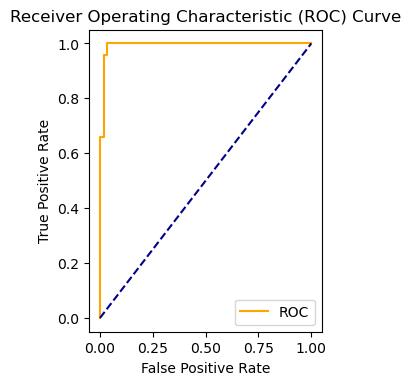

In [87]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=1, figsize=(3, 4), dpi=100, facecolor='w', edgecolor='k')

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
figure = plot_roc_curve(fpr, tpr)

## Decision Tree

Test accuracy: 0.8952380952380953
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        58
           1       0.95      0.81      0.87        47

    accuracy                           0.90       105
   macro avg       0.91      0.89      0.89       105
weighted avg       0.90      0.90      0.89       105



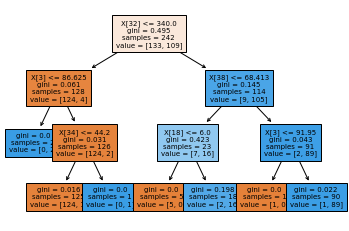

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier(criterion= 'gini', max_depth=3,random_state=0) #max_depth=7,

clf = clf.fit(X_train ,y_train)

#print ('train accuracy:', clf.score(X_train, y_train))
print ('Test accuracy:', clf.score(X_test, y_test))

y_pred_tree = clf.predict(X_test)

print('Classification report:',"\n", classification_report(y_test, y_pred_tree))

tree.plot_tree(clf, filled = True, fontsize = 7) 
plt.show() 

In [61]:
#x [32, 3,38 ,   34globulin, 18'Urea'] #'Lactate dehydrogenase'  'Hypersensitive c-reactive protein'    'Serum chloride'
#'globulin'  Urea  'serum sodium'
#4:''eosinophils(%)'' 41 'eGFR' 39 serum sodium 

#X.columns[34]

In [62]:
#implementing 5-fold cross validation for the decission tree
#c_val_clf= DecisionTreeClassifier(max_depth=4,random_state=0) #max_depth=7,

scores = cross_val_score(clf, X, y, cv=5, scoring= 'roc_auc')
print('Cross Validation ROC area under the curve scores:', scores)
print('Mean of Cross Validation scores:', scores.mean())

Cross Validation ROC area under the curve scores: [0.93134822 0.95847039 0.92911715 0.98005093 0.91850594]
Mean of Cross Validation scores: 0.943498528035349


## AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier(random_state=0)
adaboost = adaboost.fit(X_train, y_train)

y_pred_adaboost = adaboost.predict(X_test)

print ('Test accuracy:', adaboost.score(X_test, y_test),"\n")
print('Classification report:',"\n", classification_report(y_test, y_pred_adaboost))

Test accuracy: 0.9428571428571428 

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        58
           1       0.98      0.89      0.93        47

    accuracy                           0.94       105
   macro avg       0.95      0.94      0.94       105
weighted avg       0.95      0.94      0.94       105



In [66]:
scores = cross_val_score(adaboost, X, y, cv=5, scoring= 'roc_auc')
print('Cross Validation ROC area under the curve scores:', scores)
print('Mean of Cross Validation scores:', scores.mean())

Cross Validation ROC area under the curve scores: [0.98428453 0.98190789 0.98387097 0.97962649 0.95585739]
Mean of Cross Validation scores: 0.9771094532236297


## Support Vector Machine 

In [68]:
import numpy as np
from sklearn import svm
#from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

#svm_model = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_model =svm.SVC(kernel='rbf',  C=100)

svm_model.fit(X_train, y_train)

y_pred_SVM = svm_model.predict(X_test)

print ('Test accuracy:', svm_model.score(X_test, y_test))
print('Classification report:',"\n", classification_report(y_test, y_pred_SVM))

Test accuracy: 0.9809523809523809
Classification report: 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        58
           1       0.98      0.98      0.98        47

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [69]:
scores = cross_val_score(svm_model, X, y, cv=5, scoring= 'roc_auc')
print('Cross Validation ROC area under the curve scores:', scores)
print('Mean of Cross Validation scores:', scores.mean())

Cross Validation ROC area under the curve scores: [1.         0.99506579 0.99745331 0.98811545 0.95925297]
Mean of Cross Validation scores: 0.9879775042444823


## Neural Network

In [70]:
#pip install keras

In [71]:
#pip install tensorflow

In [72]:
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential() # Initialising the ANN

classifier.add(Dense(units = 20, activation = 'relu', input_dim = 43))
classifier.add(Dense(units = 10, activation = 'relu'))
classifier.add(Dense(units = 7, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [26]:
#pip install pydot

In [27]:
#conda install -c anaconda graphviz

In [28]:
#conda install pydot-ng 

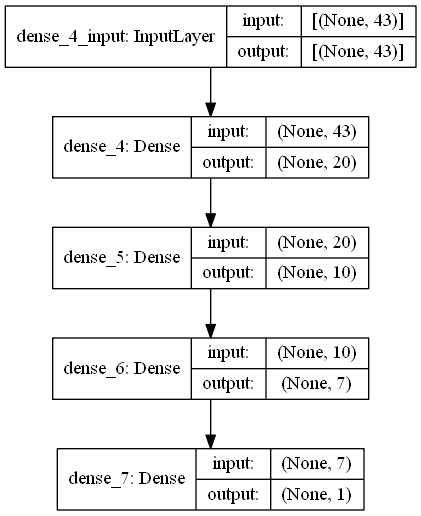

In [74]:
#NN model structure plot
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
#model = Sequential()

plot_model(classifier, show_shapes=True, show_layer_names=True)

In [75]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy')

In [76]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 1000)

Epoch 1/1000
25/25 [==============================] - 0s 527us/step - loss: 13.0748
Epoch 2/1000
25/25 [==============================] - 0s 527us/step - loss: 5.3219
Epoch 3/1000
25/25 [==============================] - 0s 582us/step - loss: 2.8396
Epoch 4/1000
25/25 [==============================] - 0s 582us/step - loss: 1.7421
Epoch 5/1000
25/25 [==============================] - 0s 582us/step - loss: 0.8987
Epoch 6/1000
25/25 [==============================] - 0s 492us/step - loss: 0.6608
Epoch 7/1000
25/25 [==============================] - 0s 524us/step - loss: 0.5200
Epoch 8/1000
25/25 [==============================] - 0s 517us/step - loss: 0.3453
Epoch 9/1000
25/25 [==============================] - 0s 448us/step - loss: 0.2674
Epoch 10/1000
25/25 [==============================] - 0s 582us/step - loss: 0.1642
Epoch 11/1000
25/25 [==============================] - 0s 457us/step - loss: 0.1816
Epoch 12/1000
25/25 [==============================] - 0s 610us/step - loss: 0.1774


25/25 [==============================] - 0s 483us/step - loss: 0.0305
Epoch 99/1000
25/25 [==============================] - 0s 498us/step - loss: 0.0632
Epoch 100/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0424
Epoch 101/1000
25/25 [==============================] - 0s 527us/step - loss: 0.0455
Epoch 102/1000
25/25 [==============================] - 0s 495us/step - loss: 0.0691
Epoch 103/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0256
Epoch 104/1000
25/25 [==============================] - 0s 518us/step - loss: 0.0619
Epoch 105/1000
25/25 [==============================] - 0s 500us/step - loss: 0.0738
Epoch 106/1000
25/25 [==============================] - 0s 537us/step - loss: 0.0629
Epoch 107/1000
25/25 [==============================] - 0s 457us/step - loss: 0.0802
Epoch 108/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0346
Epoch 109/1000
25/25 [==============================] - 0s 475us/step - loss: 0.0

25/25 [==============================] - 0s 479us/step - loss: 0.0236
Epoch 195/1000
25/25 [==============================] - 0s 439us/step - loss: 0.0226
Epoch 196/1000
25/25 [==============================] - 0s 490us/step - loss: 0.0289
Epoch 197/1000
25/25 [==============================] - 0s 585us/step - loss: 0.0291
Epoch 198/1000
25/25 [==============================] - 0s 522us/step - loss: 0.0132
Epoch 199/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0508
Epoch 200/1000
25/25 [==============================] - 0s 535us/step - loss: 0.0182
Epoch 201/1000
25/25 [==============================] - 0s 665us/step - loss: 0.0150
Epoch 202/1000
25/25 [==============================] - 0s 479us/step - loss: 0.0204
Epoch 203/1000
25/25 [==============================] - 0s 544us/step - loss: 0.0112
Epoch 204/1000
25/25 [==============================] - 0s 540us/step - loss: 0.0192
Epoch 205/1000
25/25 [==============================] - 0s 540us/step - loss: 0.

25/25 [==============================] - 0s 449us/step - loss: 0.0027
Epoch 291/1000
25/25 [==============================] - 0s 459us/step - loss: 0.0034
Epoch 292/1000
25/25 [==============================] - 0s 440us/step - loss: 0.0024
Epoch 293/1000
25/25 [==============================] - 0s 505us/step - loss: 0.0168
Epoch 294/1000
25/25 [==============================] - 0s 532us/step - loss: 0.0103
Epoch 295/1000
25/25 [==============================] - 0s 494us/step - loss: 0.0057
Epoch 296/1000
25/25 [==============================] - 0s 500us/step - loss: 0.0049
Epoch 297/1000
25/25 [==============================] - 0s 443us/step - loss: 0.0066
Epoch 298/1000
25/25 [==============================] - 0s 457us/step - loss: 0.0030
Epoch 299/1000
25/25 [==============================] - 0s 457us/step - loss: 0.0040
Epoch 300/1000
25/25 [==============================] - 0s 457us/step - loss: 0.0025
Epoch 301/1000
25/25 [==============================] - 0s 540us/step - loss: 0.

25/25 [==============================] - 0s 499us/step - loss: 0.0026
Epoch 387/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0013
Epoch 388/1000
25/25 [==============================] - 0s 441us/step - loss: 0.0276
Epoch 389/1000
25/25 [==============================] - 0s 432us/step - loss: 0.0088
Epoch 390/1000
25/25 [==============================] - 0s 476us/step - loss: 8.9671e-04
Epoch 391/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0022
Epoch 392/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0012
Epoch 393/1000
25/25 [==============================] - 0s 457us/step - loss: 0.0029
Epoch 394/1000
25/25 [==============================] - 0s 491us/step - loss: 8.6550e-04
Epoch 395/1000
25/25 [==============================] - 0s 539us/step - loss: 0.0171
Epoch 396/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0058
Epoch 397/1000
25/25 [==============================] - 0s 456us/step - 

25/25 [==============================] - 0s 499us/step - loss: 3.8607e-06
Epoch 480/1000
25/25 [==============================] - 0s 457us/step - loss: 1.4745e-06
Epoch 481/1000
25/25 [==============================] - 0s 486us/step - loss: 2.2141e-06
Epoch 482/1000
25/25 [==============================] - 0s 540us/step - loss: 2.8470e-04
Epoch 483/1000
25/25 [==============================] - 0s 457us/step - loss: 1.8598e-05
Epoch 484/1000
25/25 [==============================] - 0s 499us/step - loss: 0.0018
Epoch 485/1000
25/25 [==============================] - 0s 582us/step - loss: 1.4085e-05
Epoch 486/1000
25/25 [==============================] - 0s 490us/step - loss: 5.2638e-06
Epoch 487/1000
25/25 [==============================] - 0s 629us/step - loss: 1.8266e-06
Epoch 488/1000
25/25 [==============================] - 0s 577us/step - loss: 1.8385e-06
Epoch 489/1000
25/25 [==============================] - 0s 584us/step - loss: 1.0328e-06
Epoch 490/1000
25/25 [==================

25/25 [==============================] - 0s 479us/step - loss: 4.0169e-08
Epoch 572/1000
25/25 [==============================] - 0s 493us/step - loss: 2.5953e-05
Epoch 573/1000
25/25 [==============================] - 0s 499us/step - loss: 3.1547e-08
Epoch 574/1000
25/25 [==============================] - 0s 492us/step - loss: 4.2240e-09
Epoch 575/1000
25/25 [==============================] - 0s 457us/step - loss: 6.6746e-09
Epoch 576/1000
25/25 [==============================] - 0s 499us/step - loss: 9.8227e-09
Epoch 577/1000
25/25 [==============================] - 0s 503us/step - loss: 3.6535e-09
Epoch 578/1000
25/25 [==============================] - 0s 520us/step - loss: 8.3284e-09
Epoch 579/1000
25/25 [==============================] - 0s 521us/step - loss: 0.0202
Epoch 580/1000
25/25 [==============================] - 0s 687us/step - loss: 4.9744e-06
Epoch 581/1000
25/25 [==============================] - 0s 499us/step - loss: 6.5663e-07
Epoch 582/1000
25/25 [==================

25/25 [==============================] - 0s 533us/step - loss: 1.0884e-07
Epoch 664/1000
25/25 [==============================] - 0s 449us/step - loss: 9.1307e-08
Epoch 665/1000
25/25 [==============================] - 0s 479us/step - loss: 7.5033e-08
Epoch 666/1000
25/25 [==============================] - 0s 466us/step - loss: 2.8877e-08
Epoch 667/1000
25/25 [==============================] - 0s 480us/step - loss: 7.9069e-09
Epoch 668/1000
25/25 [==============================] - 0s 491us/step - loss: 3.6001e-09
Epoch 669/1000
25/25 [==============================] - 0s 576us/step - loss: 5.7887e-08
Epoch 670/1000
25/25 [==============================] - 0s 665us/step - loss: 0.1097
Epoch 671/1000
25/25 [==============================] - 0s 588us/step - loss: 6.0589e-09
Epoch 672/1000
25/25 [==============================] - 0s 541us/step - loss: 2.3597e-09
Epoch 673/1000
25/25 [==============================] - 0s 582us/step - loss: 7.1548e-09
Epoch 674/1000
25/25 [==================

25/25 [==============================] - 0s 457us/step - loss: 3.1831e-10
Epoch 756/1000
25/25 [==============================] - 0s 457us/step - loss: 2.7591e-10
Epoch 757/1000
25/25 [==============================] - 0s 499us/step - loss: 3.7147e-10
Epoch 758/1000
25/25 [==============================] - 0s 474us/step - loss: 1.3548e-10
Epoch 759/1000
25/25 [==============================] - 0s 536us/step - loss: 0.0870
Epoch 760/1000
25/25 [==============================] - 0s 540us/step - loss: 1.0663e-07
Epoch 761/1000
25/25 [==============================] - 0s 540us/step - loss: 2.0730e-08
Epoch 762/1000
25/25 [==============================] - 0s 499us/step - loss: 4.5451e-08
Epoch 763/1000
25/25 [==============================] - 0s 499us/step - loss: 3.9472e-08
Epoch 764/1000
25/25 [==============================] - 0s 525us/step - loss: 1.5121e-08
Epoch 765/1000
25/25 [==============================] - 0s 514us/step - loss: 3.9410e-09
Epoch 766/1000
25/25 [==================

25/25 [==============================] - 0s 572us/step - loss: 8.7990e-11
Epoch 848/1000
25/25 [==============================] - 0s 608us/step - loss: 1.5645e-10
Epoch 849/1000
25/25 [==============================] - 0s 659us/step - loss: 1.1639e-10
Epoch 850/1000
25/25 [==============================] - 0s 576us/step - loss: 2.8761e-10
Epoch 851/1000
25/25 [==============================] - 0s 612us/step - loss: 2.4892e-10
Epoch 852/1000
25/25 [==============================] - 0s 605us/step - loss: 2.9534e-10
Epoch 853/1000
25/25 [==============================] - 0s 532us/step - loss: 3.6310e-10
Epoch 854/1000
25/25 [==============================] - 0s 595us/step - loss: 3.5522e-10
Epoch 855/1000
25/25 [==============================] - 0s 532us/step - loss: 2.3664e-10
Epoch 856/1000
25/25 [==============================] - 0s 499us/step - loss: 1.4388e-10
Epoch 857/1000
25/25 [==============================] - 0s 476us/step - loss: 1.6600e-10
Epoch 858/1000
25/25 [==============

Epoch 939/1000
25/25 [==============================] - 0s 457us/step - loss: 8.5853e-11
Epoch 940/1000
25/25 [==============================] - 0s 490us/step - loss: 1.2424e-10
Epoch 941/1000
25/25 [==============================] - 0s 458us/step - loss: 1.4903e-10
Epoch 942/1000
25/25 [==============================] - 0s 530us/step - loss: 4.1161e-10
Epoch 943/1000
25/25 [==============================] - 0s 540us/step - loss: 2.3660e-10
Epoch 944/1000
25/25 [==============================] - 0s 582us/step - loss: 1.0314e-10
Epoch 945/1000
25/25 [==============================] - 0s 520us/step - loss: 1.4723e-10
Epoch 946/1000
25/25 [==============================] - 0s 493us/step - loss: 1.5464e-10
Epoch 947/1000
25/25 [==============================] - 0s 493us/step - loss: 1.8562e-10
Epoch 948/1000
25/25 [==============================] - 0s 497us/step - loss: 1.0986e-10
Epoch 949/1000
25/25 [==============================] - 0s 499us/step - loss: 1.9446e-10
Epoch 950/1000
25/25 

In [77]:
y_pred_NN = classifier.predict(X_test)
y_pred_NN = [ 1 if y>=0.8 else 0 for y in y_pred_NN ]

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

print(classification_report(y_test, y_pred_NN))

print('The ROC area under the curve is:',roc_auc_score(y_test, y_pred_NN))
print('The F1 score is:', f1_score(y_test, y_pred_NN, average='weighted'))
#roc_auc_score(y, clf.decision_function(X))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.91      0.96        47

    accuracy                           0.96       105
   macro avg       0.97      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

The ROC area under the curve is: 0.9574468085106382
The F1 score is: 0.9616931216931217


## Naive Bayes

In [88]:
### Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred_bayes = gnb.fit(X_train, y_train).predict(X_test)

print("Number of mislabeled points out of a total %d test points : %d"
      % (X_test.shape[0], (y_test != y_pred_bayes).sum()),'\n')

print(classification_report(y_test, y_pred_bayes))

Number of mislabeled points out of a total 105 test points : 5 

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        58
           1       0.96      0.94      0.95        47

    accuracy                           0.95       105
   macro avg       0.95      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105



In [89]:
#from sklearn.metrics import f1_score
#print('The ROC area under the curve is:',roc_auc_score(y_test, y_pred_bayes))
#print('The F1 score is:', f1_score(y_test, y_pred_bayes, average='weighted'))

In [39]:
cv_gnb = GaussianNB()
scores = cross_val_score(cv_gnb, X, y, cv=5, scoring= 'roc_auc')
print('Cross Validation ROC area under the curve scores:', scores)
print('Mean of Cross Validation scores:', scores.mean())

Cross Validation ROC area under the curve scores: [0.97684036 0.94366776 0.99320883 0.94397284 0.95670628]
Mean of Cross Validation scores: 0.9628792145531323


## Principal Component Analysis (PCA)

In [91]:
#how many components to get X of the explained variane
from sklearn.decomposition import PCA

pca=PCA(0.85)
pca_dim_reducts = pca.fit_transform(X)
pca_regenerations = pca.inverse_transform(pca_dim_reducts)

print("Number of principal components needed to deduct 85% of the explained variance :", pca.explained_variance_.shape[0])

Number of principal components needed to deduct 85% of the explained variance : 3
